In [1]:
import sys, json
sys.path.insert(0, r'C:\Users\tglaubach\repos\pydocmaker\src')

In [2]:
import pydocmaker as pyd

# Example on how to Build Documents

## Document Builder

The `DocBuilder` class from `pydocmaker` is the basic building element for making a report. Here each element will be appended to the end of the document if no `index` or `chapter` is given. Alternatively the chapter to which to append a document part can be specified by `chapter='xxx'`. Furthermore you can also specify the index position (after which part of the document to insert) by adding `index=i` where `i` is `int`. You can use the object like a list.



## Document Parts and Schema for them

The basic building blocks for a document are called `document parts` and are always either of type `dict` or type `str` (A string will automatically parsed as a text dict element). 

Each document part has a `typ` field which states the type of document part and a `children` field, which can be either `string` or `list`. This way hirachical documents can be build if needed. 

The `document-parts` are:
- `text`: holds text as string (`children`) which will inserted directly as raw text
- `markdown`: holds text as string (`children`) which will be rendered by markdown markup language before parsing into the documents
- `image`: holds all needed information to render an image in a report. The image data is saved as a string in base64 encoded format in the `imageblob` field. A `caption` (str) can be given which will be inserted below the image. The filename is given by the `children` field. The relative width can be given by the `width` field (float). 
- `verbatim`: holds text as string (`children`) which will be inserted as preformatted text into the documents
- `iter`: a meta `document-part` which holds n sub `document-parts` in the `children` field which will be rendered and inserted into the documents in given order. 

An example of the whole schema is given below.

In [3]:
print(json.dumps(pyd.get_schema(), indent=2))

{
  "text": {
    "typ": "text",
    "children": ""
  },
  "markdown": {
    "typ": "markdown",
    "children": ""
  },
  "image": {
    "typ": "image",
    "children": "img_1725544170991780900.png",
    "imageblob": "",
    "caption": "",
    "width": 0.8
  },
  "verbatim": {
    "typ": "verbatim",
    "children": ""
  },
  "iter": {
    "typ": "iter",
    "children": []
  }
}


## Building Documents

## Working with Raw Text and Markdown

below is shown how to add text and markdown to a document with some dummy text.

In [4]:
doc = pyd.DocBuilder()

content = """## Example Text

One morning, when Gregor Samsa woke from troubled dreams, he found himself *transformed* in his bed into a horrible  [vermin](http://en.wikipedia.org/wiki/Vermin "Wikipedia Vermin"). He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections. The bedding was hardly able to cover **strong** it and seemed ready to slide off any moment. His many legs, pitifully thin compared with the size of the rest of him, link waved abouthelplessly as he looked. <cite>“What's happened to me?”</cite> he thought. It wasn't a dream. His room, a proper human room although a little too small, lay peacefully between its four familiar walls.</p>

### The bedding was hardly able to cover it.

It showed a lady fitted out with a fur hat and fur boa who sat upright, raising a heavy fur muff that covered the whole of her lower arm towards the viewer a solid fur muff into which her entire forearm disappeared..

#### Things we know about Gregor's sleeping habits.

- He always slept on his right side.
- He has to get up early (to start another dreadful day).
- He has a drawer and a alarm clock next to his bed.
- His mother calls him when he gets up to late.
"""

doc.add_kw('markdown', content)

# we can also add some raw text
text_content = """First he wanted to stand up quietly and undisturbed, get dressed, above all have breakfast, and only then consider further action, for (he noticed this clearly) by thinking things over in bed he would not reach a reasonable conclusion. He remembered that he had already often felt a light pain or other in bed, perhaps the result of an awkward lying position, which later turned out to be purely imaginary when he stood up, and he was eager to see how his present fantasies would gradually dissipate. That the change in his voice was nothing other than the onset of a real chill, an occupational illness of commercial travelers, of that he had not the slightest doubt."""
doc.add_kw('text', text_content)

doc.show()

## Working with Preformatted Text

### Inserting Preformatted text in Markdown (not advised!)

In [5]:
doc = pyd.DocBuilder()
doc.add("this is how to embed preformatted text via markdown")

# this is some verbatim ("code like" or preformatted text) content you want to add to your document
verb_content = """
    function metamorphose(protagonist,author){
        if( protagonist.name.first === 'Gregor' && author.name.last === 'Kafka' ){
            protagonist.species = 'insect';
        }
    }
"""

# you can either try adding it as markdown directly (which might not get handled properly in all document types)
doc.add_kw('markdown', verb_content)


doc.show()

### Inserting Preformatted Text as Verbatim Document-Part (Advised solution!)

In [6]:

doc = pyd.DocBuilder()
doc.add("this is how to embed preformatted text via a verbatim part")

# this is some verbatim ("code like" or preformatted text) content you want to add to your document
verb_content = """
    function metamorphose(protagonist,author){
        if( protagonist.name.first === 'Gregor' && author.name.last === 'Kafka' ){
            protagonist.species = 'insect';
        }
    }
"""

# or use a verbatim element directly (preferred!)
doc.add_kw('verbatim', verb_content)


doc.show()


## Working with Images

### Add Images from Links to Report

In [7]:


doc = pyd.DocBuilder()
doc.add("this is how to download a image from the internet and embed it in your document")

# this is how to download a image from the internet and embed it in your document
doc.add_image("https://github.githubassets.com/assets/GitHub-Mark-ea2971cee799.png")

doc.show()

### Add Images from Pyplot Figures to Report

say you have a figure like below

Text(0.5, 0.5, 'watermark')

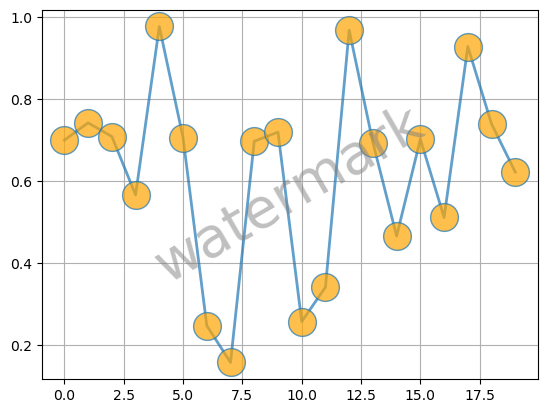

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()
ax.plot(np.random.rand(20), '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
ax.grid()

ax.text(0.5, 0.5, 'watermark', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation=30)

you can embed it in your document like this:

In [9]:


doc = pyd.DocBuilder()
doc.add("this is how to embed a figure from pyplot to your document")

# this is how to embed a pyplot figure in your document
doc.add_image(fig, caption='test figure')
# this is equivalent
# doc.add_fig(fig, caption='test figure')


doc.show()

you can also just add the last figure which was generated (pyplots `gfc()`) by omitting the fig argument 

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)


doc = pyd.DocBuilder()
doc.add("this is how to download a figure from pyplot to your document")

# this is how to add the last pyplot figure as image
doc.add_fig(caption='last figure')

doc.show()

plt.close() # prevents the plot from showing up as a pyplot figure in this notebook

C:\Users\tglaubach\AppData\Local\Temp\ipykernel_40500\3649557798.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection='polar')


### Add figure from numpy array

**NOTE**: This needs the PIL library installed!

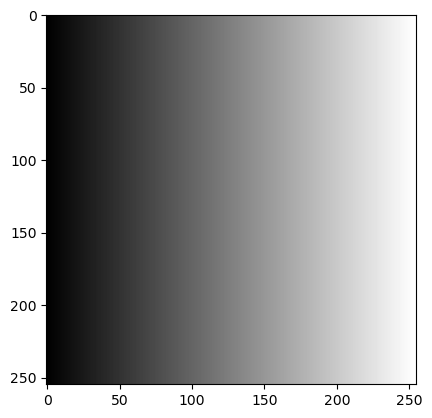

In [11]:
# make a dummy image (numpy array)
m = [np.arange(255).astype(np.uint8).tolist() for i in range(255)]
m = np.array(m, dtype=np.uint8)
plt.imshow(m, cmap='gray')

In [12]:
import pydocmaker as pyd

doc = pyd.DocBuilder()
doc.add('dummy text')

doc.add_image(m, caption = 'numpy generated image', width=0.8)
doc.show()


## Adding to Specific Chapters

as said above you can also add elements to specific chapters or locations. below is an example


In [13]:
doc = pyd.DocBuilder()

# this will add a section 'Introduction'
doc.add_chapter('Introduction')

# now I can add / access the section (which is a DocBuilder) direcly like a dict
doc.add('dummy text which will be added to the introduction', chapter='Introduction')

# this will add the section 'Weather Info' and add a markdown element to it
doc.add_kw('markdown', 'This is my fancy `markdown` text for the Second Chapter', 
           chapter='Second Chapter')

# I can also add parts to the Introduction like this
doc.add_kw('markdown', 'This text will be appended to the first section after the 2nd element (at i=1) of the report (`index` is the index to insert "before" and is zero based!), The definition of the chapter "Introduction" is the 1st element of the document (at i=0)', 
           index=2)

# and like this
doc.add_image("https://github.githubassets.com/assets/GitHub-Mark-ea2971cee799.png", 
              chapter='Second Chapter')


doc.show()

## Getting Specific Chapters

get a single chapter, convert it to a DocBuilder and show it

In [14]:
pyd.DocBuilder(doc.get_chapter('Introduction')).show()

get ranges for all chapters

In [15]:
doc.get_chapters(as_ranges=True)

{'Introduction': slice(0, 3, None), 'Second Chapter': slice(3, 5, None)}

get all chapters with content

In [16]:
doc.get_chapters()

{'Introduction': [{'typ': 'markdown', 'children': '## Introduction'},
  {'typ': 'text',
   'children': 'dummy text which will be added to the introduction'},
  {'typ': 'markdown',
   'children': 'This text will be appended to the first section after the 2nd element (at i=1) of the report (`index` is the index to insert "before" and is zero based!), The definition of the chapter "Introduction" is the 1st element of the document (at i=0)'}],
 'Second Chapter': [{'typ': 'markdown', 'children': '## Second Chapter'},
  {'typ': 'markdown',
   'children': 'This is my fancy `markdown` text for the Second Chapter'}]}

# Saving a Report as list




In [17]:
doc.dump()

[{'typ': 'markdown', 'children': '## Introduction'},
 {'typ': 'text',
  'children': 'dummy text which will be added to the introduction'},
 {'typ': 'markdown',
  'children': 'This text will be appended to the first section after the 2nd element (at i=1) of the report (`index` is the index to insert "before" and is zero based!), The definition of the chapter "Introduction" is the 1st element of the document (at i=0)'},
 {'typ': 'markdown', 'children': '## Second Chapter'},
 {'typ': 'markdown',
  'children': 'This is my fancy `markdown` text for the Second Chapter'},
 {'typ': 'image',
  'children': 'GitHub-Mark-ea2971cee799.png',
  'imageblob': 'iVBORw0KGgoAAAANSUhEUgAAAjAAAAIwCAMAAACvL6FdAAAC/VBMVEX////+/v79/f38/Pz7+/v6+vr6+fn5+fn4+Pj39/f29vb19fX09PTz8/Py8vLx8fHw8PDw7+/v7u7u7u7t7e3s7Ozr6+vq6urp6eno6Ojn5+fm5ubm5eXl5OTk4+Pj4+Pi4uLh4eHg4ODf39/e3t7d3d3c3Nzc29vb2tra2dnZ2NjY2NjX19fW1tbV1dXU1NTT09PS0tLS0dHR0NDQz8/Pzs7Ozc3Nzc3MzMzLy8vKysrJycnIyMjIx8fHxsbGxcXFxMTEw8PDwsLCwsLBwcHAwMC/v7++vr69vb29

# Saving a Report in JSON format

In [18]:
print(doc.to_json())

[
    {
        "typ": "markdown",
        "children": "## Introduction"
    },
    {
        "typ": "text",
        "children": "dummy text which will be added to the introduction"
    },
    {
        "typ": "markdown",
        "children": "This text will be appended to the first section after the 2nd element (at i=1) of the report (`index` is the index to insert \"before\" and is zero based!), The definition of the chapter \"Introduction\" is the 1st element of the document (at i=0)"
    },
    {
        "typ": "markdown",
        "children": "## Second Chapter"
    },
    {
        "typ": "markdown",
        "children": "This is my fancy `markdown` text for the Second Chapter"
    },
    {
        "typ": "image",
        "children": "GitHub-Mark-ea2971cee799.png",
        "imageblob": "iVBORw0KGgoAAAANSUhEUgAAAjAAAAIwCAMAAACvL6FdAAAC/VBMVEX////+/v79/f38/Pz7+/v6+vr6+fn5+fn4+Pj39/f29vb19fX09PTz8/Py8vLx8fHw8PDw7+/v7u7u7u7t7e3s7Ozr6+vq6urp6eno6Ojn5+fm5ubm5eXl5OTk4+Pj4+Pi4uLh4eHg4ODf39/